# Project: Silhouette of Vehicles - Unsupervised Learning

# Description about data
Features taken from car silhouettes taken from various perspectives are included in the data. For the experiment, four "Corgie" model automobiles were utilised: an Opel Manta 400, a Saab 9000, a Cheverolet van, and a double-decker bus. It was anticipated that this specific set of vehicles would make it easier to identify the cars, but more difficult to distinguish the bus, van, and any of the cars respectively.

# Objective:
Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data.

In [2]:
# Importing required libraries 

from pyforest import LazyImport

df = pd.read_csv('Data/vehicle.csv')

<IPython.core.display.Javascript object>

In [3]:
# Let's have look to first five and last five rows

df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [4]:
# To build machine learning model all the data must be in int or float because ML model dose not recognize OBJECT data type.

df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
# As per data we can see that there are total 846 rows and 19 columns
# We have total 19 features or Dimensions

df.shape

(846, 19)

In [6]:
# Let's have a look at 5 Number summary of the data.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [7]:
# Let's check for the is there any null values in our data?

df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
# Now we will fill this null values with the Median

newdf = df.copy() # First make a copy of original dataset


In [9]:
X = newdf.iloc[:,:18]
y = newdf.iloc[:,18]

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='median',verbose=1)

transformed_valued = imputer.fit_transform(X)
colum = X.columns

df1 = pd.DataFrame(transformed_valued,columns=colum)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df1.isnull().sum() 

# Now missing value problem solved. Let's move ahead.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

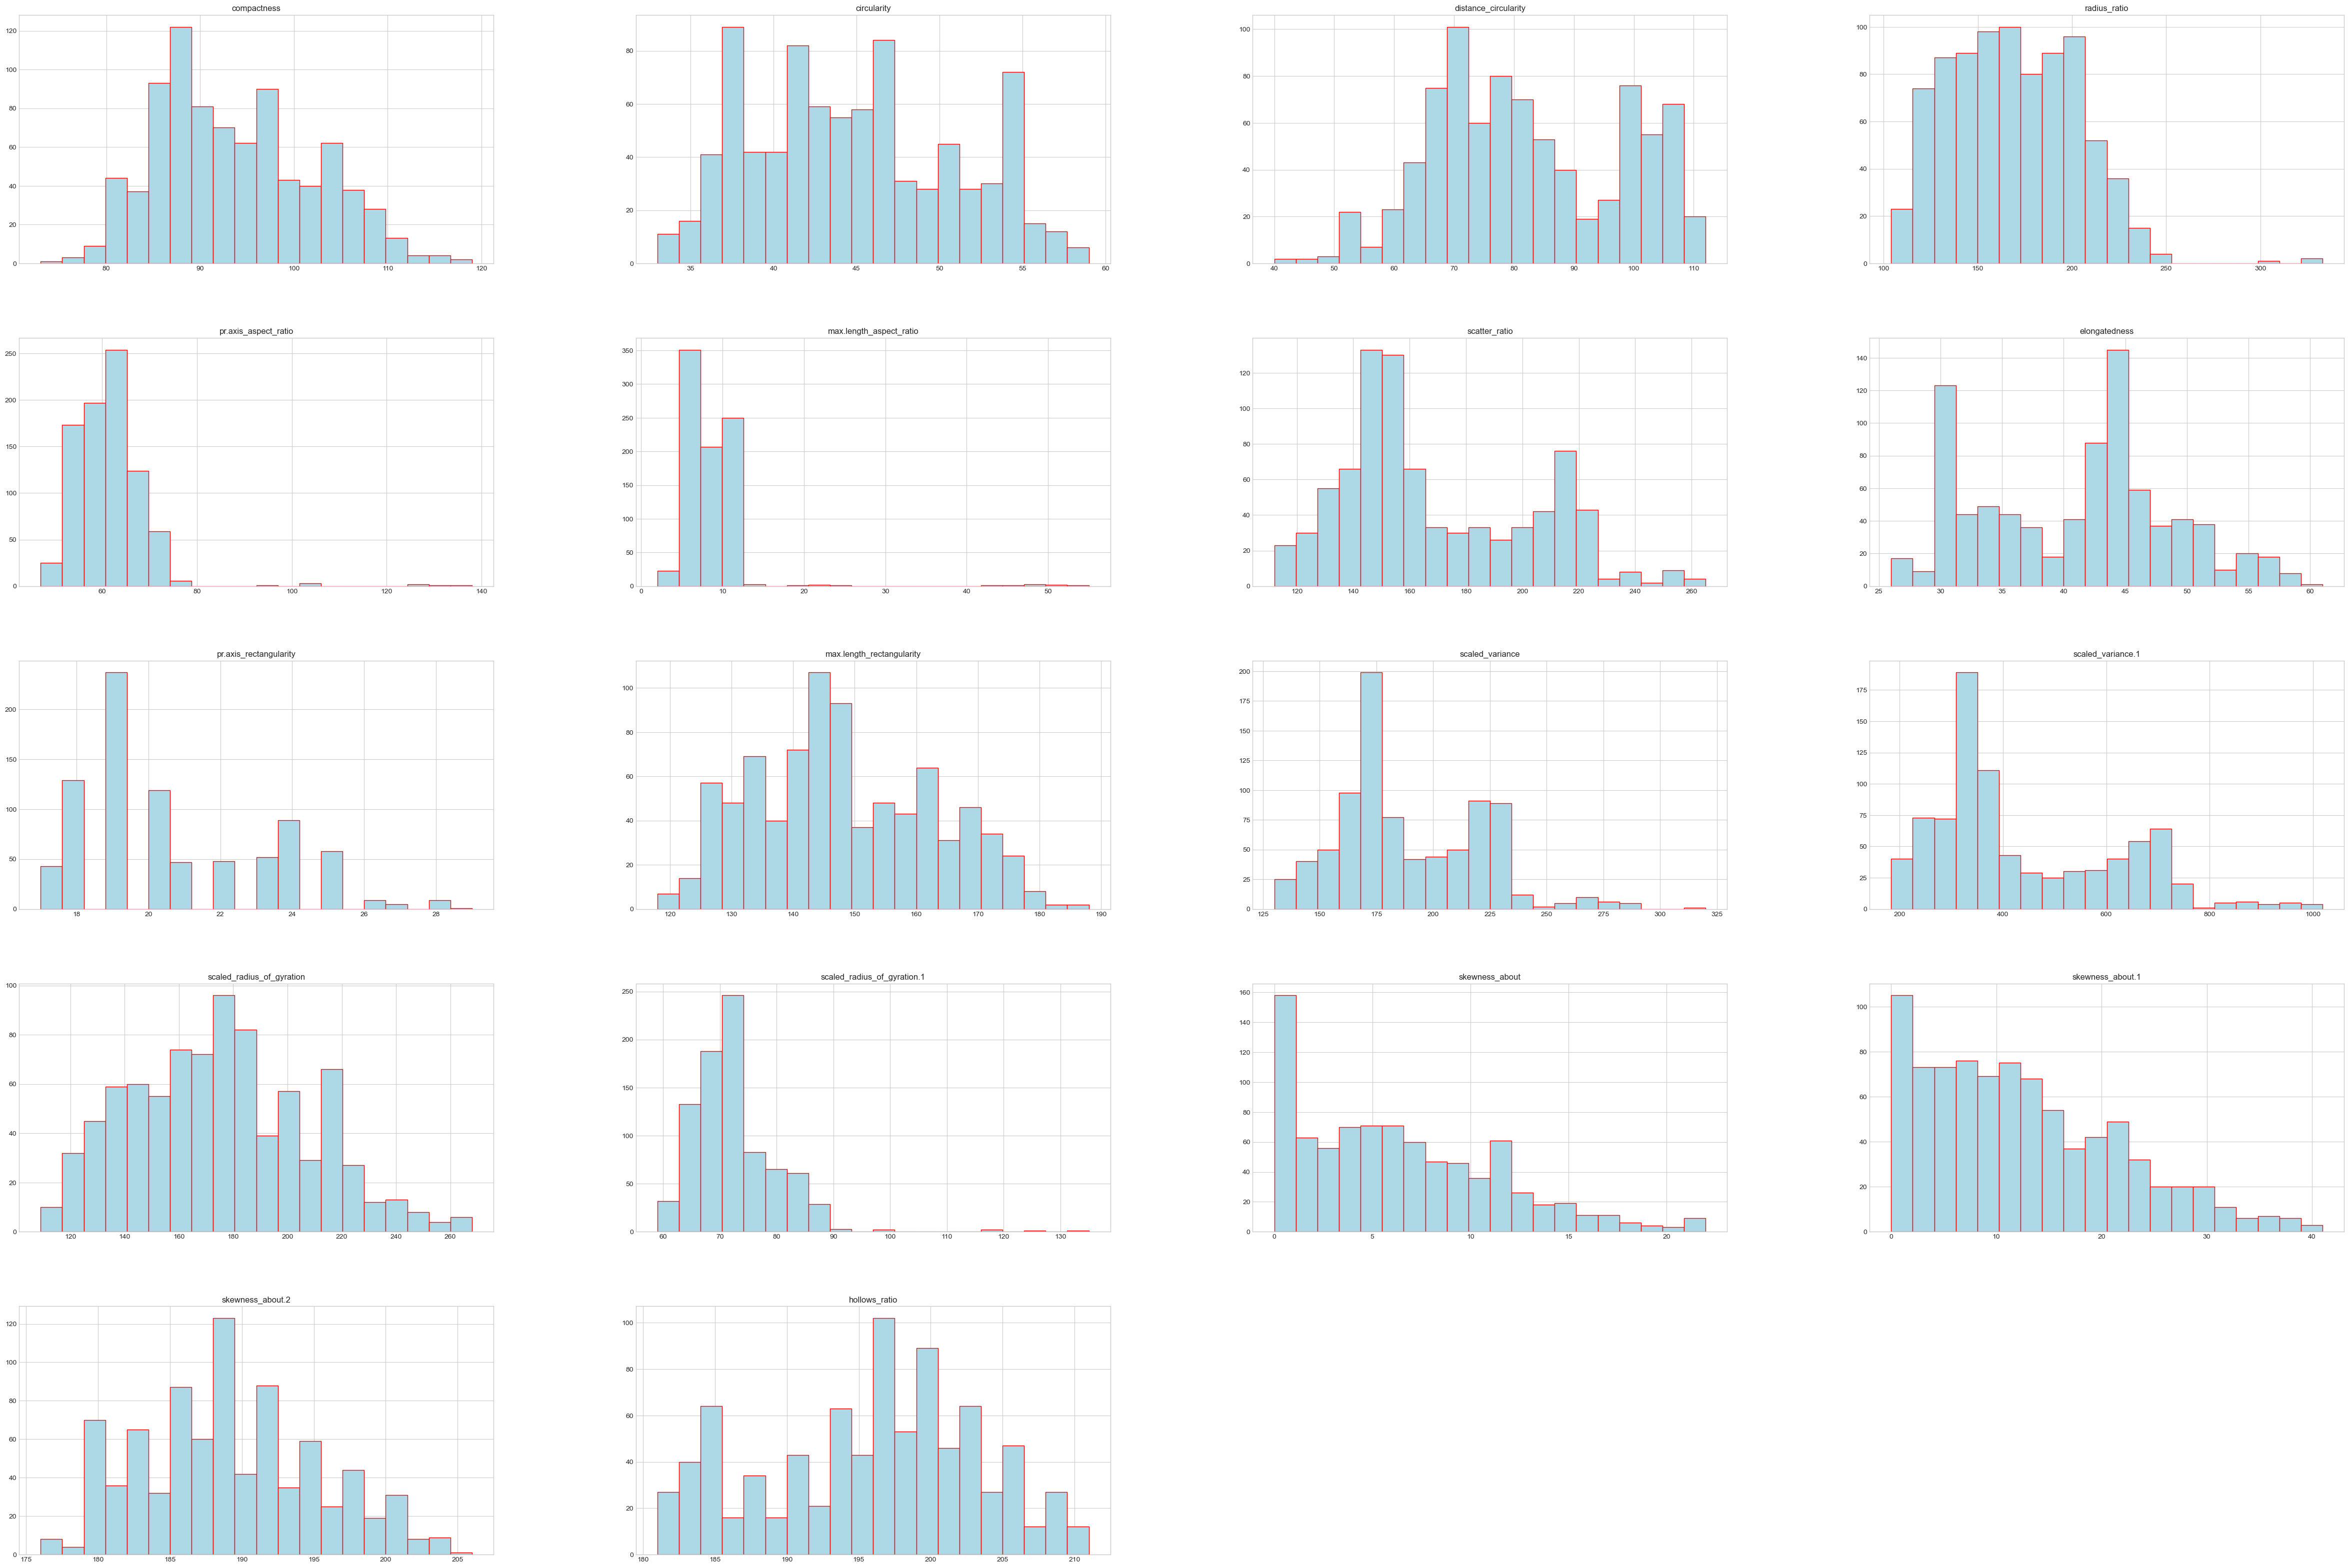

In [12]:
# Let's look at the data how data is distributed.

plt.style.use('seaborn-whitegrid')

df1.hist(bins=20, figsize=(60,40),color='lightblue',edgecolor='red',)
plt.show()

From the above plot, it can be seen most of the attributes are normally distributed with few skewed to the right and left.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

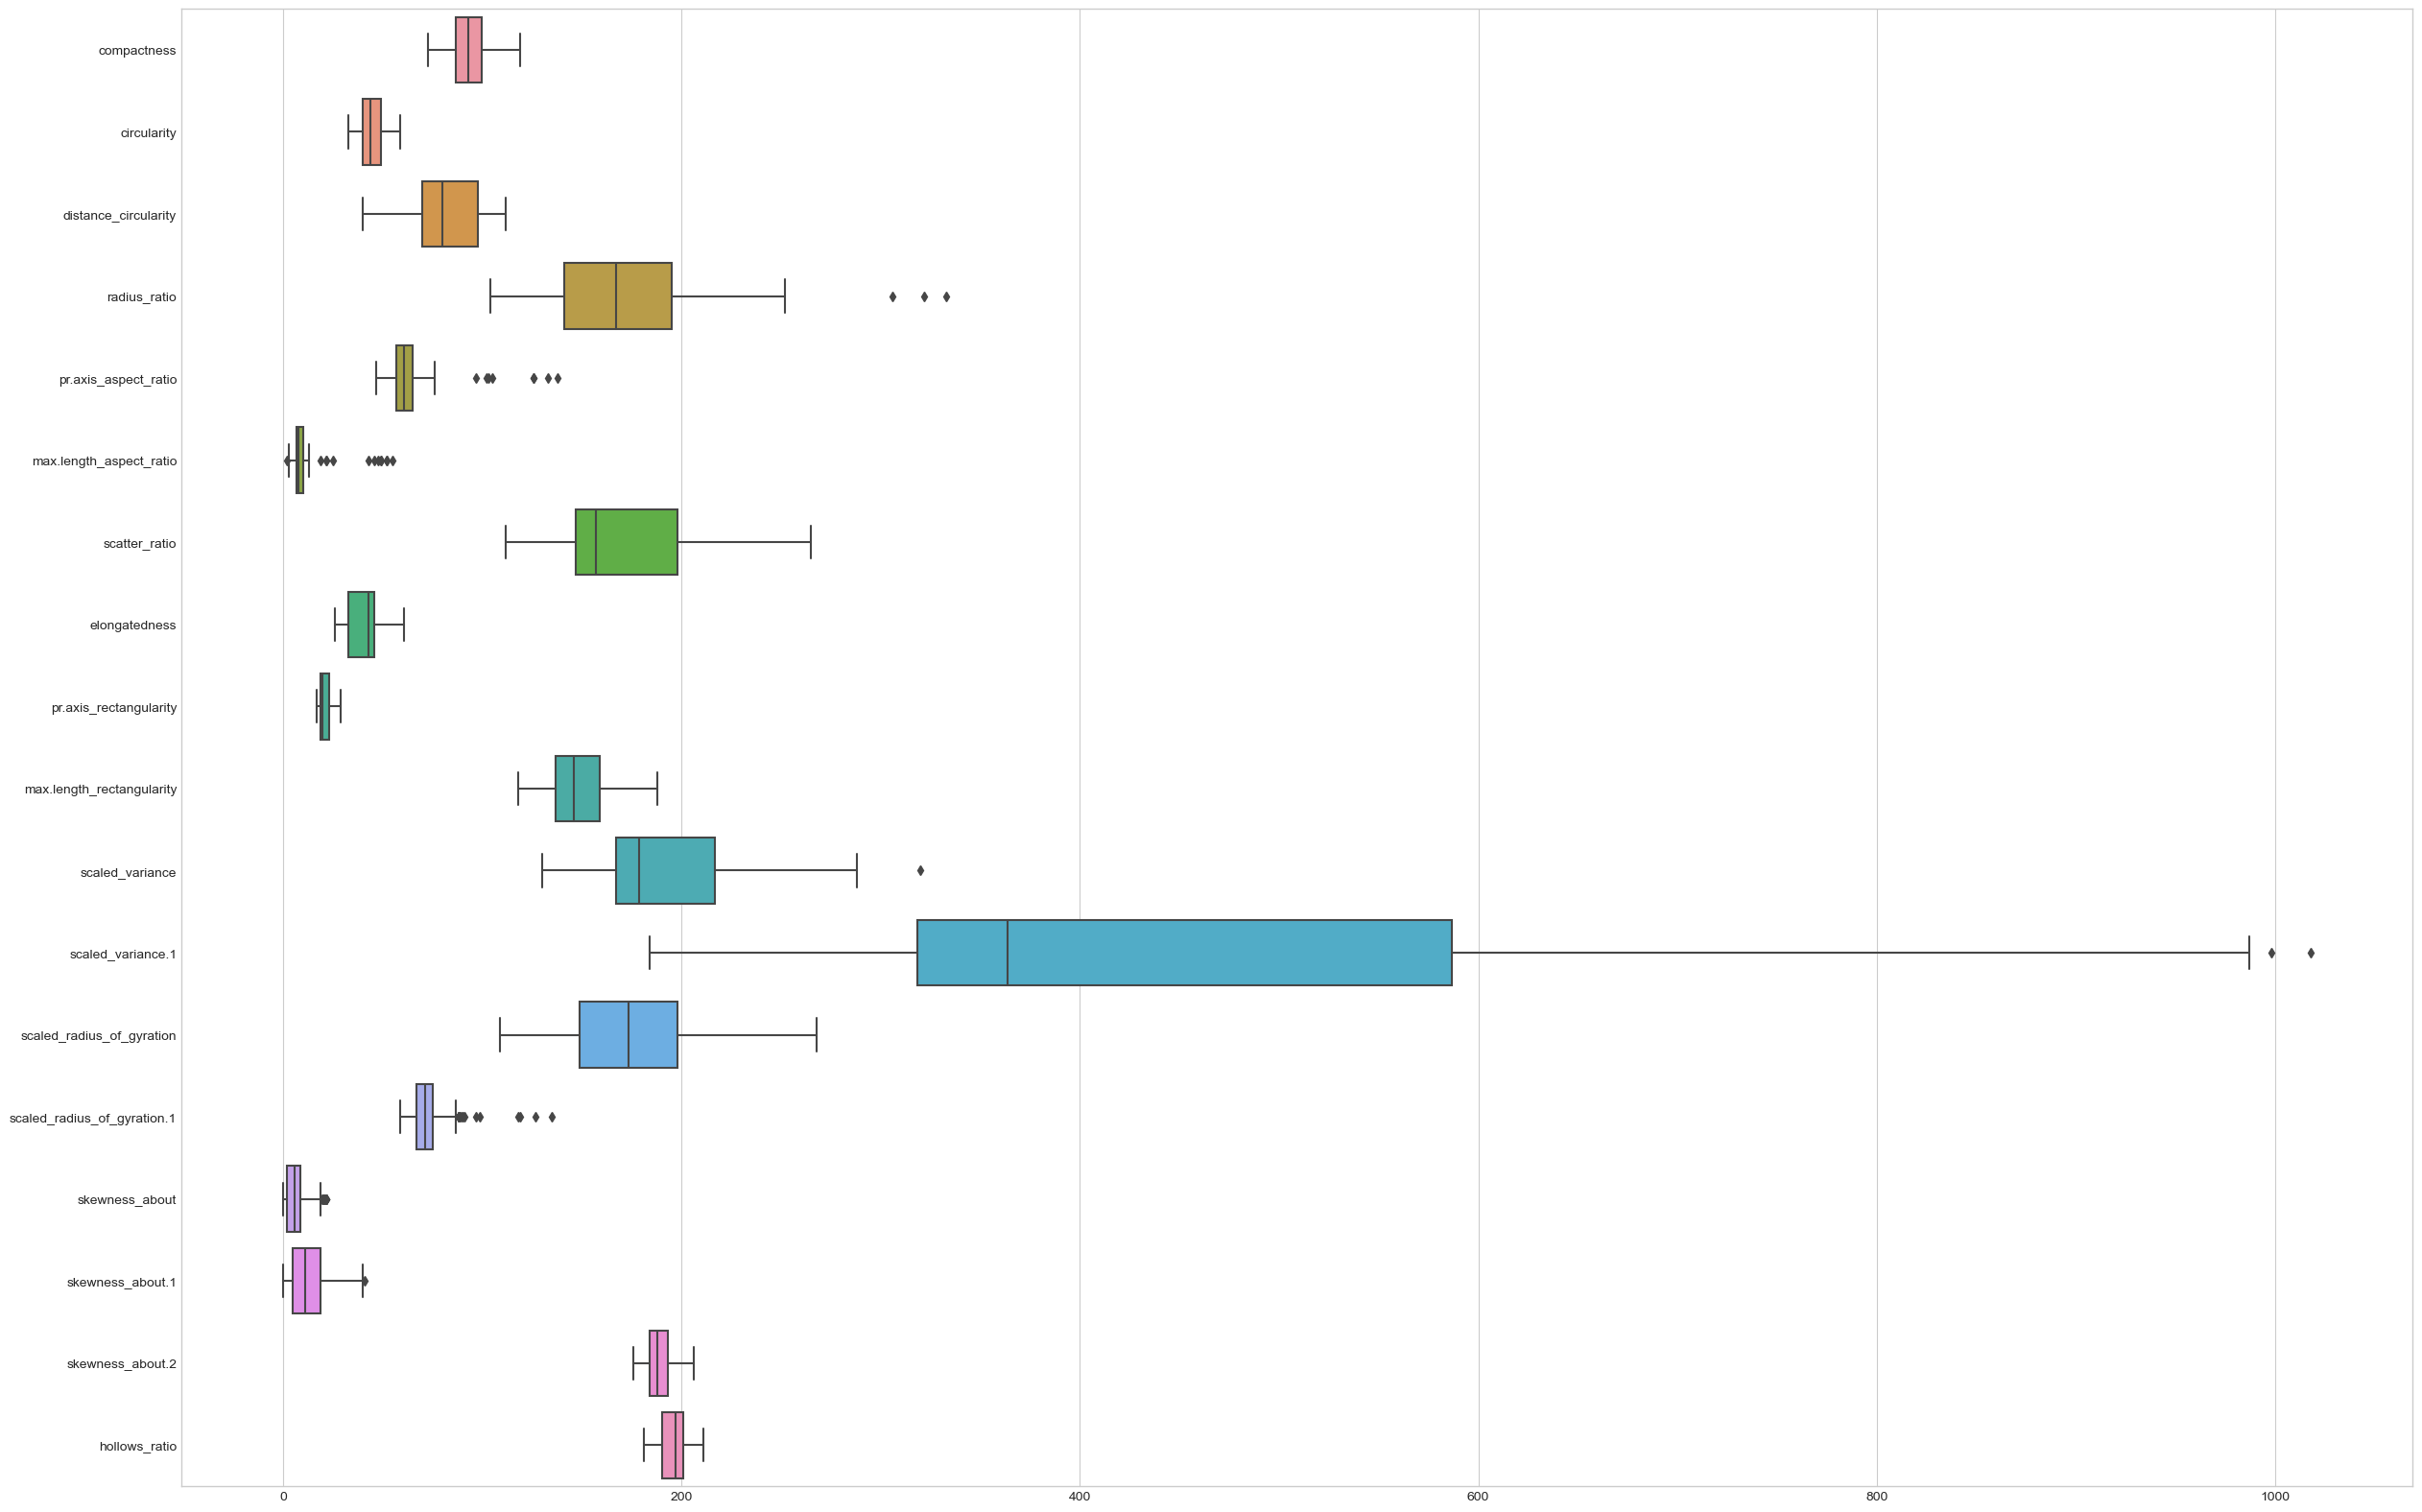

In [13]:
# Let's have a look by using boxplot


plt.figure(figsize=(30,20))
sns.boxplot(data=df1,orient='h')

plt.show()

Scaled_variance_1 is having a huge effect on our data distribution since is having a wider measurement of scale. We will therefore drop that and visualise it alone while we visualise the rest of the data set.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

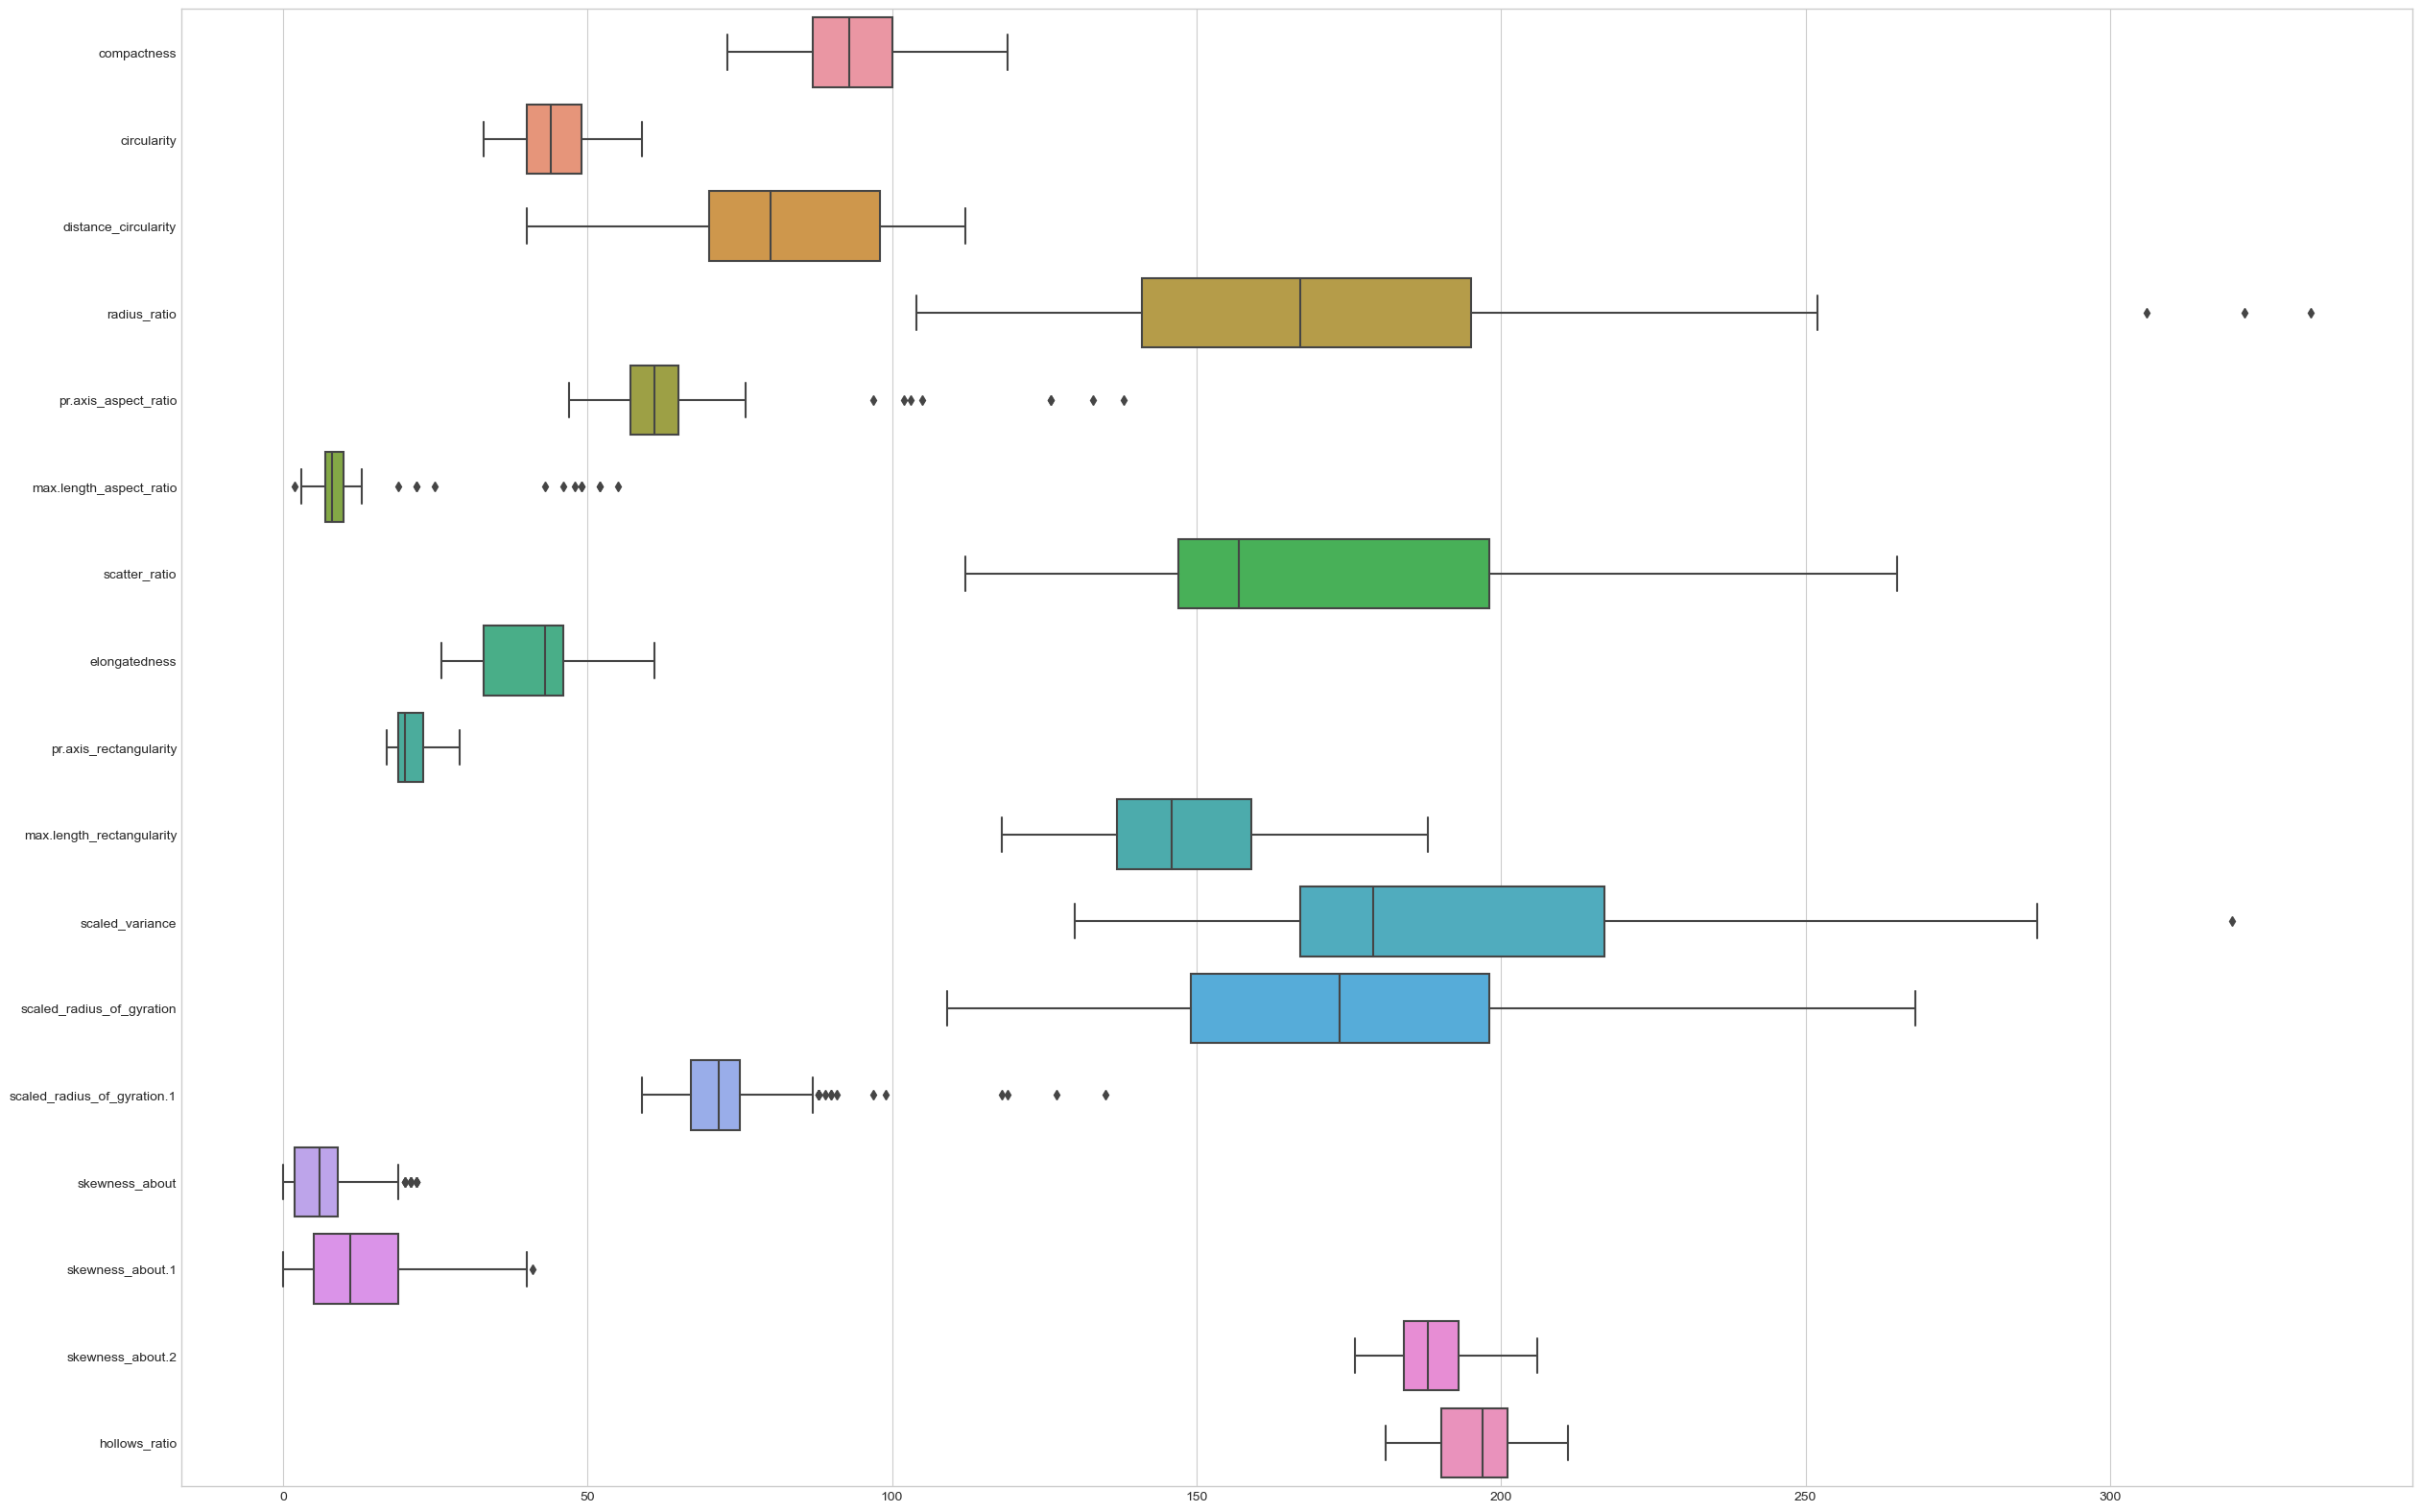

In [14]:
plt.figure(figsize=(30,20))

sns.boxplot(data=df1.drop('scaled_variance.1',axis=1),orient='h')

plt.show()

Now it can be easy to observe the outliers. As it can be seen that **pr.axis_aspect_ratio, max.length_aspect_ratio  and scaled_radius_of_gyration.1** have the most outliers.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

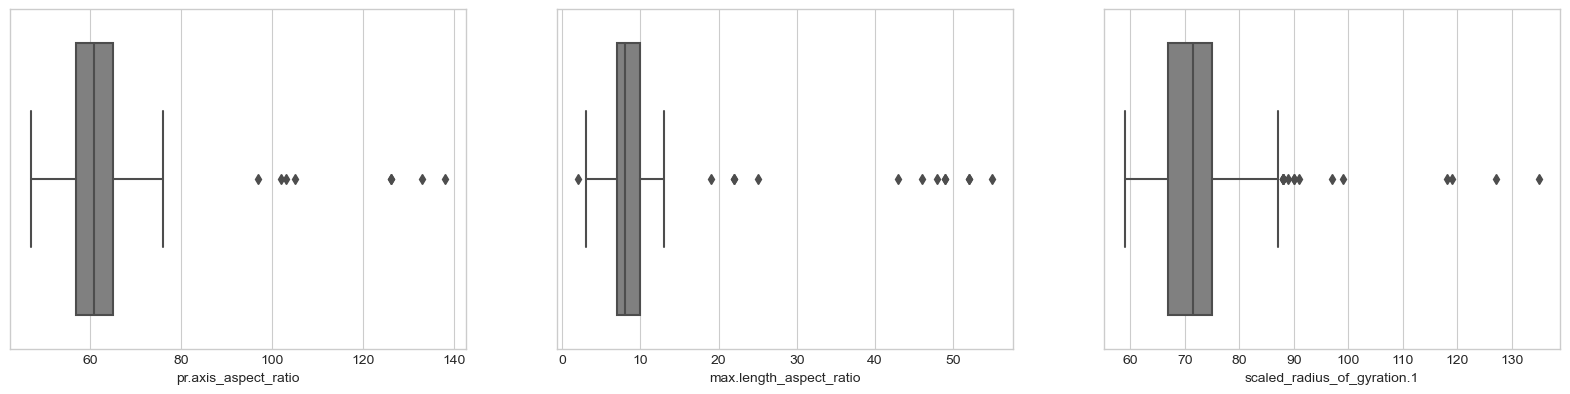

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = df1['pr.axis_aspect_ratio'],color='gray')

plt.subplot(3,3,2)
sns.boxplot(x = df1['max.length_aspect_ratio'],color='gray')

plt.subplot(3,3,3)
sns.boxplot(x=df1['scaled_radius_of_gyration.1'],color='gray')

plt.show()

In [16]:
from scipy.stats import iqr

Q1 = df1.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 -Q1

print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.75
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [17]:
# Now remove the outliers from dataset. If you want outlier's list simply just remove '~' tilde sign. 
# If you want without outlier's list then just add '~' sign.

df2 = df1[~(( df1 < ( Q1 - 1.5 * IQR) ) | ( df1 > ( Q3 + 1.5 * IQR))).any(axis=1)]


In [18]:
df2.shape

(813, 18)

In [19]:
print(" Dataset's shape before outlier:",df1.shape,'\n',
      "Dataset's shape after outlier:",df2.shape)

 Dataset's shape before outlier: (846, 18) 
 Dataset's shape after outlier: (813, 18)


In [20]:
print('There were total',len(df1)-len(df2),'outlier in the dataset.')

There were total 33 outlier in the dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

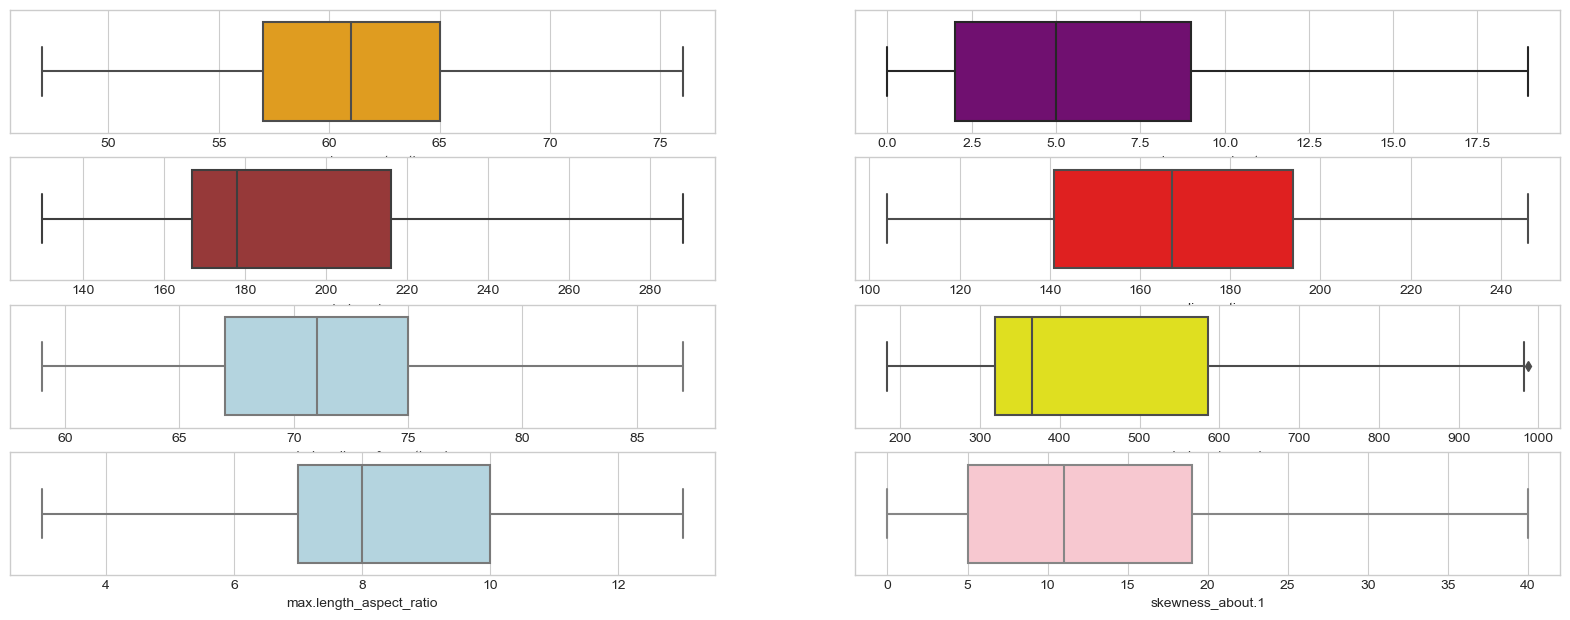

In [21]:
# Let's again visualising the data without the outliers.

plt.figure(figsize=(20,15))

plt.subplot(8,2,1)
sns.boxplot(x= df2['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,2,2)
sns.boxplot(x= df2['skewness_about'], color='purple')

plt.subplot(8,2,3)
sns.boxplot(x= df2['scaled_variance'], color='brown')

plt.subplot(8,2,4)
sns.boxplot(x= df2['radius_ratio'], color='red')

plt.subplot(8,2,5)
sns.boxplot(x= df2['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,2,6)
sns.boxplot(x= df2['scaled_variance.1'], color='yellow')

plt.subplot(8,2,7)
sns.boxplot(x= df2['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,2,8)
sns.boxplot(x= df2['skewness_about.1'], color='pink')

plt.show()

As per figure it can seen that outliers has been removed. Now let's move forward.

In [22]:
# Let's check the values of 'y' or 'Depedent Variable'.

print(y.value_counts())

car    429
bus    218
van    199
Name: class, dtype: int64


<IPython.core.display.Javascript object>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

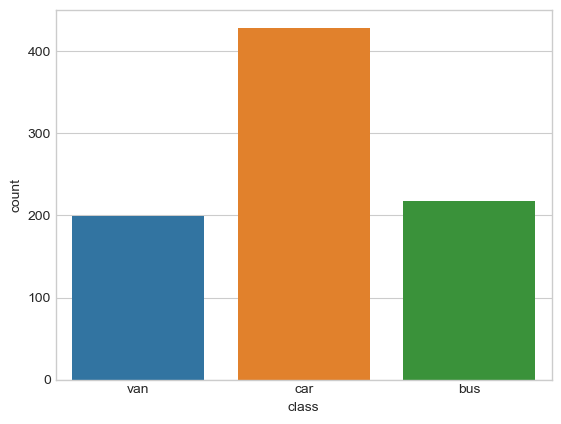

In [23]:
sns.countplot(y)
plt.show()

In [24]:
# Let's have a look on what is correlation between indepedent attributs

df1.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.689743,0.091534,0.148249,0.812620,-0.788750,0.813694,0.676143,0.762070,0.814012,0.585243,-0.249593,0.236078,0.157015,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.620912,0.153778,0.251467,0.847938,-0.821472,0.843400,0.961318,0.796306,0.835946,0.925816,0.051946,0.144198,-0.011439,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.767035,0.158456,0.264686,0.905076,-0.911307,0.893025,0.774527,0.861519,0.886017,0.705771,-0.225944,0.113924,0.265547,0.146098,0.332732
radius_ratio,0.689743,0.620912,0.767035,1.000000,0.663447,0.450052,0.734429,-0.789481,0.708385,0.568949,0.793415,0.718436,0.536372,-0.180397,0.048713,0.173741,0.382214,0.471309
pr.axis_aspect_ratio,0.091534,0.153778,0.158456,0.663447,1.000000,0.648724,0.103732,-0.183035,0.079604,0.126909,0.272910,0.089189,0.121971,0.152950,-0.058371,-0.031976,0.239886,0.267725
max.length_aspect_ratio,0.148249,0.251467,0.264686,0.450052,0.648724,1.000000,0.166191,-0.180140,0.161502,0.305943,0.318957,0.143253,0.189743,0.295735,0.015599,0.043422,-0.026081,0.143919
scatter_ratio,0.812620,0.847938,0.905076,0.734429,0.103732,0.166191,1.000000,-0.971601,0.989751,0.809083,0.948662,0.993012,0.799875,-0.027542,0.074458,0.212428,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.789481,-0.183035,-0.180140,-0.971601,1.000000,-0.948996,-0.775854,-0.936382,-0.953816,-0.766314,0.103302,-0.052600,-0.185053,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.708385,0.079604,0.161502,0.989751,-0.948996,1.000000,0.810934,0.934227,0.988213,0.796690,-0.015495,0.083767,0.214700,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.568949,0.126909,0.305943,0.809083,-0.775854,0.810934,1.000000,0.744985,0.794615,0.866450,0.041622,0.135852,0.001366,-0.103948,0.076770


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

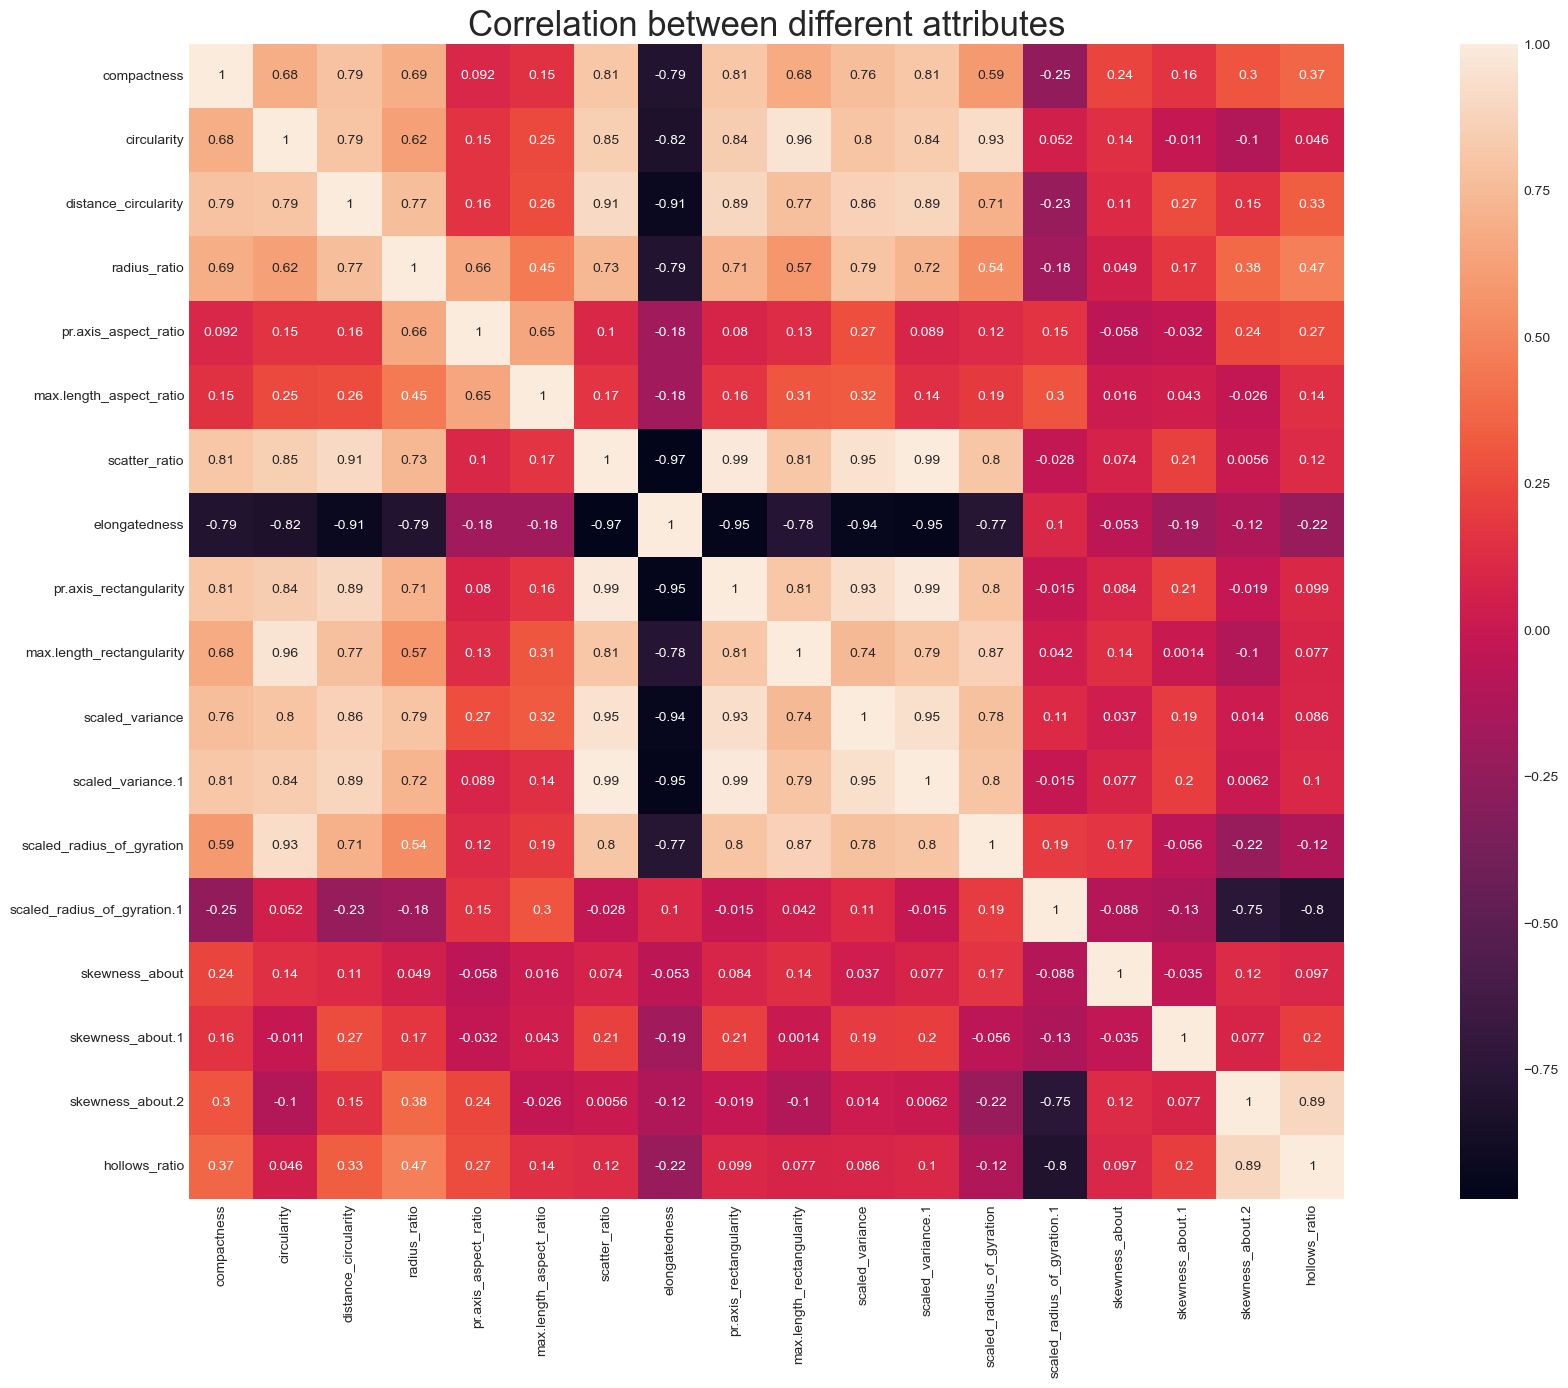

In [25]:
plt.figure(figsize=(30,15))

sns.heatmap(df1.corr(),vmax=1,square=True,annot=True)
plt.title("Correlation between different attributes",fontsize=25)

plt.show()

  - pr.axis_recatngularity and Scaled Variance.1 have very high correlated with value of 0.99
  - scatter_ratio and pr.axis_recatngularity have very high correlated with value of 0.99
  - max.length_recatngularity and circularity also have very high correlated with value of 0.96

     Among other features as well.

     However, there some features which very low correlated and even negatively correlated such as:

   - skewness_about.2 and circularity with a value of -0.1
   - scaled_radius_of_gyration_1 and radius_ratio with a value of -0.18

   Among other relationships can be clearly seen from the heatmap

In [ ]:
sns.pairplot(df1,diag_kind= 'kde')
plt.show()

<IPython.core.display.Javascript object>

Our previous heatmap's insights are confirmed by the pairplot above. Moreover, scaled variance.1 and 0.95 appear to have a very strong positive correlation. There appears to be a strong positive correlation between skewness_about_2 and hollow_ratio and coeff: 0.89.

It appears that elongatedness and scatter_ratio have a very strong negative correlation. Pr.axis_rectangularity and elongatedness appear to be strongly correlated negatively, with a val of -0.97.

Elongatedness, pr.axis_rectangularity, and Scaled Variance & Scaled Variance.1 were found to be strongly correlated by our pairplot analysis; therefore, they should be carefully dropped off before we proceed with model building.


# Choosing the right attributes for model building
With our objective of predicting an object to be a van or bus or car based on some input features, ideally, we assume that there is little or no multicollinearity between the features. If otherwise our data contains features that are highly correlated then we will encounter what is know as “Multicollinearity”.

Multicollinearity can lead to a misleading results. This situation happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy.

It is quit reasonable to drop one feature if we have 2 features in our datset which are highly correlated since there's no point in using both features. From the above heatmap as well as the pairplot, we recongnised that there lots of features that are highly correlated, negatively or positively with values as high as 0.99 and -0.97.

These features are listed below:



In [ ]:
#  max.length_rectangularity
#  scaled_radius_of_gyration
#  skewness_about.2
#  scatter_ratio
#  elongatedness
#  pr.axis_rectangularity
#  scaled_variance
#  scaled_variance.1

As previously mentioned, removing one of the highly correlated features is the simplest method of handling multicollinearity. We will, however, employ a superior strategy called dimension reduction, more especially Principle Component Analysis (PCA).

New variables known as principal components are created by constructing linear combinations or mixtures of the original variables. The majority of the information in the original variables is compressed or squeezed into the first components, and the new variables (principal components) are uncorrelated as a result of these combinations.


# Performing PCA

In [ ]:
from scipy.stats import zscore

xscaled= df1.apply(zscore)
xscaled.head()

In [ ]:
# Get the confusion matrix

covmatrix = np.cov(xscaled,rowvar= False)

print(covmatrix)

In [ ]:
covmatrix.shape

In [ ]:
#Performing PCA on all the 18 components

from sklearn.decomposition import PCA

pca = PCA(n_components=18)

pca.fit(xscaled)

In [ ]:
# The eigen Values

print(pca.explained_variance_)

In [ ]:
# The eigen Vectors

print(pca.components_)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
#visualisation of the explained variance in the Eigen vectors

plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel("Variation explained")
plt.xlabel("Eigen Value")

plt.show()

In [ ]:
#Elbow visualisation of variance in the Eigen vectors

plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction
Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [ ]:
#Using only 8 Eigen vectors that can be explained instead of the 18 vectors

pca2 = PCA(n_components=8)

pca2.fit(xscaled)

print(pca.components_)
print(pca.explained_variance_ratio_)

Xpca3 = pca2.fit_transform(xscaled)

In [ ]:
Xpca3

In [ ]:
#pairplot of the new variables showing no correlation

sns.pairplot(pd.DataFrame(Xpca3))
plt.show()

# Fit Linear Model
Lets construct two linear models. The first with all the 17 independent variables and the second with only the 8 new variables constructed using PCA.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(xscaled, y)
regression_model.score(xscaled, y)

In [ ]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

# Splitting the dataset into training and testing set

In [ ]:
from sklearn.model_selection import KFold

x_train, x_test, y_train, y_test = train_test_split(df1,y,test_size=0.20,random_state=23)

k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

In [ ]:
Orig_y_predict = svc.predict(x_test) #predict on test data

In [ ]:
svc.score(x_test, y_test) 

In [ ]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(xscaled,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(Xpca3,y,test_size=0.30,random_state=1)


In [ ]:
svc.fit(Orig_X_train,Orig_y_train) #SVC on original data

In [ ]:
Orig_y_predict = svc.predict(Orig_X_test) #Prediction on original dataset

In [ ]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test) #Prediction on pca test dataset 


In [ ]:
#display accuracy score of both models
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("-------"*10)
print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

# Observation
On the training data set, our support vector classifier with no PCA performed achieved a 95% accuracy score.

The accuracy score of the SVC model on PCA components (reduced dimensions) is 93%.

It appears that we only lost about 2% of R^2 by reducing dimensionality to 8 components! A decrease in R^2 is anticipated because this is an insample (on training data). It still appears to be simple to defend the removal of variables. Since there would be less over-fit, an out-of-sample (on test data) with the eight independent variables is probably going to perform better.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, yhat, labels=[0, 1, 2])
    print("Confusion Matrix For:", datatype, "\n", cm)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Blues",
                xticklabels=[str1, str2, str3],
                yticklabels=[str1, str2, str3])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix for {datatype}")
    plt.show()

# Call the function with the original and PCA-reduced datasets
draw_confmatrix(Orig_y_test, Orig_y_predict, "Van", "Car", "Bus", "Original Data Set")
draw_confmatrix(pca_y_test, pca_y_predict, "Van", "Car", "Bus", "Reduced Dimensions Using PCA")

# Print classification reports for both datasets
print("Classification Report For Raw Data:\n", classification_report(Orig_y_test, Orig_y_predict))
print("Classification Report For PCA:\n", classification_report(pca_y_test, pca_y_predict))


# Observations
**Confusion Matrix On Original Data:**

Out of the 59 actual vans in the original data set, our model correctly classified 58 of them, with only one being incorrectly predicted as a car.

Our model correctly identified 129 vehicles, but it incorrectly identified three as buses and one as a van.

Once more, out of 62 real-world bus instances, our model correctly identified 56 of them. However, it failed to correctly identify 6 buses as vans and 1 bus as a car.


**Confusion Metric On Reduced Dimesnion After PCA :**

Our model has accurately predicted 57 vans out of 59 real-world van instances, and it has made two mistakes by misclassifying vans as cars.

Our mdoel has correctly classified 126 of the 133 actual cars as cars, but it has failed in 7 instances, incorrectly classifying 5 cars as buses and 2 cars as vans.

Our model has correctly identified 54 of the 62 real buses as buses. In eight instances, it has failed, incorrectly classifying seven buses as cars and one as vans.


**Insights On Classification Reports:**

On original data:
When using the specified set of silhoutte parameters to categorise cars, our model has a 99 percent precision score. When predicting data as bus, it has a 93% precision rate, however when classifying the input as van, it has an 89% precision rate.

For van classification, our model's recall score is 98%, for car classification, it is 97%, and for bus classification, it is 89%.

The weighted average for all classification metrics in our model is 95%.


**On Reduced Dimensions After PCA:**

When it comes to predicting van type, our model has the maximum precision score of 95%, which is superior to the prediction made on the original data set, which yielded a precision score of 89% for van.
The recall score and our model's score on the original data set are nearly identical. When it came to identifying the data as cars, it displayed the greatest recall score of 97%.
